<h1><mark style = "background: #a1f5a5">Step 0</mark>: Create Random Exp. Decaying Graph</h1>

We use numpy.rand() to create the random graph.

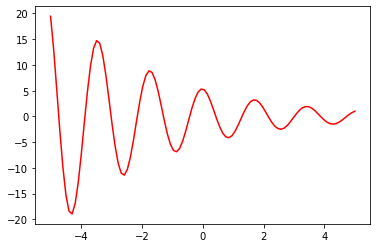

Inputs: [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Outputs: [8.494065313640233, -33.058093296457024, 38.20797487219566, -31.289847766762723, 19.457717726417563, -7.929866592193833, -0.48173564783131734, 5.016723293782436, -6.245296864363669, 5.328692869618983, -3.4585156388505895, 1.538485690086651, -0.08181232883557159, -0.745783049720871, 1.013386659931266, -0.9024505028459285, 0.6102539756387891, -0.2923957499571552, 0.041604998213926395]


In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

inputs = []
outputs = []

# THIS GIVES THE DOMAIN
x = np.linspace(-5,5,100)

# FUNCTION & PARAMETERS (RANDOMLY SELECTED)
A = np.random.uniform(3,6)
w = np.random.uniform(3,6)
T2 = np.random.uniform(3,6)
y = A*np.cos(w*x)*(2.718**(-x/T2))

# DEFINES EXPONENTIAL DECAY FUNCTION
def expDec(t, A, w, T2):
    return A*np.cos(w*t)*(2.718**(-t/T2))

# SETS UP FIGURE FOR PLOTTING
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# PLOTS THE FUNCTION
plt.plot(x,y, 'r')

# SHOW THE PLOT
plt.show()

for i in range(-9, 10): 
    inputs.append(i)
    outputs.append(expDec(i, A, w, T2))
    
print("Inputs: "+ str(inputs))
print("Outputs: "+ str(outputs))

<h1><mark style = "background: #a1f5a5">Step 1</mark>: Import the data</h1>

For now, the data is just a .txt file in the GitHub repo. Alternatively, you can directly input the points into a pandas dataframe.

In [79]:
import pandas as pd

# GET DATA FROM GITHUB REPO OR ... 
# x = pd.read_csv('https://raw.githubusercontent.com/Refath/ExtractGraph/main/ExpDecay.txt')

# PUT IT DIRECTLY IN A PANDAS DATAFRAME
points = {'Time (sec)': inputs,
        'Heart Rate (BPM)': outputs
        }

x = pd.DataFrame(points, columns = ['Time (sec)', 'Heart Rate (BPM)'])

print(x)

    Time (sec)  Heart Rate (BPM)
0           -9          8.494065
1           -8        -33.058093
2           -7         38.207975
3           -6        -31.289848
4           -5         19.457718
5           -4         -7.929867
6           -3         -0.481736
7           -2          5.016723
8           -1         -6.245297
9            0          5.328693
10           1         -3.458516
11           2          1.538486
12           3         -0.081812
13           4         -0.745783
14           5          1.013387
15           6         -0.902451
16           7          0.610254
17           8         -0.292396
18           9          0.041605


<h1><mark style = "background: #a1f5a5">Step 2</mark>: Define function and parameters</h1>

The three parameters in this case of an exponential decaying graph are $A$, $w$, and $T_2$

In [69]:
import numpy as np

# FUNCTION WHOSE PARAMETERS PROGRAM SHOULD BE GUESSING
def bpm(t, A, w, T2):
    return A*np.cos(w*t)*(2.718**(-t/T2))

<h1><mark style = "background: #a1f5a5">Step 3</mark>: Manual guess</h1>

The user's guess for each parameter is the array g = []. The for loop contains the inputs and $y$ is just an array of the outputs.

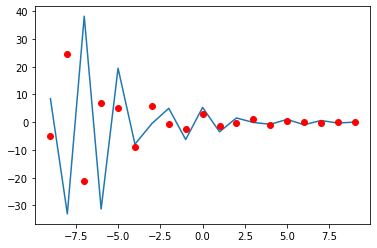

In [80]:
import matplotlib.pyplot as plt

# MANUAL GUESS
g = [3,4,3.5]

# CREATE ARRAY FOR OUTPUTS
n = len(x['Time (sec)'])
y = np.empty(n)

# TRY EVERY INPUT IN THE DOMAIN
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], g[0],g[1],g[2])

# PLOT IT ALL OUT
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'ro')

<h1><mark style = "background: #a1f5a5">Step 4</mark>: Best fit</h1>

Use the <mark>scipy.optimize curve_fit</mark> function to find the parameters which best fit the curve. 

[4.03793492e-03 4.35819335e+00 8.71702434e-01]


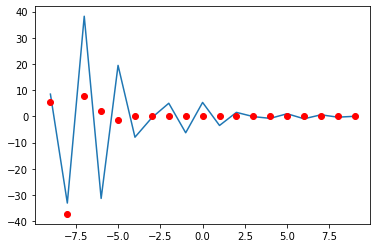

In [81]:
from scipy.optimize import curve_fit

#INPUT & OUTPUTS
t = x['Time (sec)'].values
hr = x['Heart Rate (BPM)'].values

# *MAGIC*
c, cov = curve_fit(bpm,t,hr,g)

print(c)

# TRIES OUT THE MAGIC PARAMETERS ACROSS ENTIRE DOMAIN
for i in range(n):
    y[i] = bpm(x['Time (sec)'][i], c[0],c[1],c[2])

# PLOTS *MAGIC*
plt.plot(x['Time (sec)'], x['Heart Rate (BPM)'])
plt.plot(x['Time (sec)'], y, 'ro')

<h1><mark style = "background: #a1f5a5">Step 5</mark>: Check Coefficient of Determination $R^2$</h1>

Check $R^2$ to see how well SciPy's guess matches with the true graph. The closer to 1, the better. 

In [82]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y,hr))

R^2:  -0.8424810539499981
